In [36]:
import osmnx as ox
import pandas as pd

import numpy as np
import matplotlib.pyplot as pl

import networkx as nx

import os

In [32]:


ox.config(log_file=True, log_console=True, use_cache=True)



In [14]:
#Just qc graph
place=['Québec city, canada']


graphQc = ox.graph_from_place(place, 
                       simplify=False,
                       retain_all=True)



In [22]:
#geopandas ie sf like
qcCity = ox.gdf_from_place(place[0])
qcCity.head()

bbox_east  bbox_north  bbox_south  bbox_west  \
0 -71.133661    46.98068    46.72771 -71.549217   

                                            geometry  \
0  POLYGON ((-71.5492175 46.8511815, -71.5313905 ...   

                                          place_name  
0  Quebec City, Québec (Agglomération), Capitale-...

In [23]:
print( type(graphQc) )
print( type(qcCity))

<class 'networkx.classes.multidigraph.MultiDiGraph'>
<class 'geopandas.geodataframe.GeoDataFrame'>


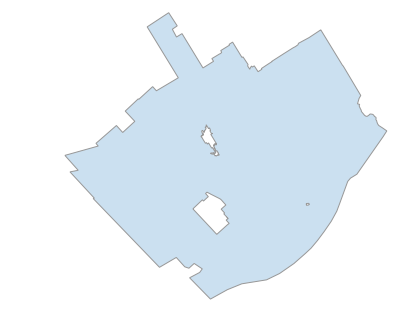

In [24]:
city = ox.project_gdf(qcCity)
fig, ax = ox.plot_shape(city)

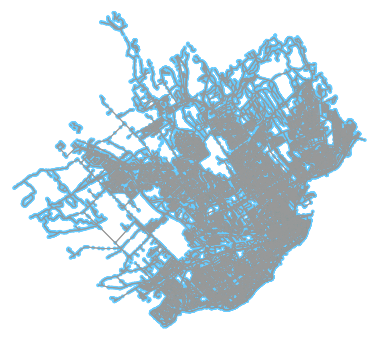

In [30]:
#this is f**long nx.draw(graphQc)
fig, ax = ox.plot_graph(graphQc)

In [68]:
dictBbox={"xmin": -71.24047, 
        "ymin" :  46.79089,
        "xmax" : -71.19298,
        "ymax" : 46.83216 }
matBbox=np.array([v for k, v in dictBbox.items() ]).reshape(2,2).transpose()
dict2={}
dict2["key"] = ["min","max"]
dict2["lng"] = matBbox[0,:]
dict2["lat"] = matBbox[1,:]
dfBbox=pd.DataFrame.from_dict(dict2)
dfBbox

key       lng       lat
0  min -71.24047  46.79089
1  max -71.19298  46.83216

In [86]:

dfBbox["dummy"] = np.ones(dfBbox.shape[0])

dfMerged=pd.merge(dfBbox,dfBbox,
        on="dummy")

dfExtremePoints=dfMerged.loc[:, ["lat_y","lng_x"]]  #permute lat lng for omsnx
dfExtremePoints

lat_y     lng_x
0  46.79089 -71.24047
1  46.83216 -71.24047
2  46.79089 -71.19298
3  46.83216 -71.19298

In [87]:
centroid=dfExtremePoints.apply( lambda x: np.mean(x))
print(type(centroid))
centroid.values

<class 'pandas.core.series.Series'>


array([ 46.811525, -71.216725])

In [94]:
bufferMeters=1*10**3
graphQcReduced = ox.graph_from_point(centroid.values,distance=bufferMeters) #use a buffer of 10 km around the centroid of the bounding box

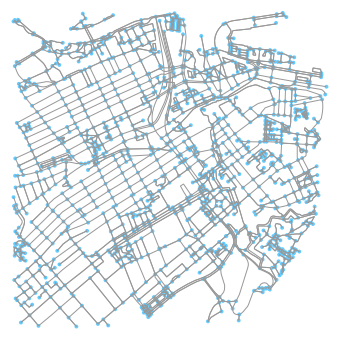

In [95]:
fig, ax= ox.plot_graph(graphQcReduced)

In [ ]:
ROOT_DIR = "/home/dhw3172/projects/tsnePCA" 

In [41]:
dfStreets=pd.read_csv(os.path.join(ROOT_DIR,"Data","Csv","uniqueStreetsWithLngLat.csv"),delimiter=";")

In [45]:
dfStreets=dfStreets.loc[ ~dfStreets.isna().any(axis=1),  ]
dfStreets

Street   lngStart   latStart     lngEnd     LatEnd
0      rue Wilfrid-Laurier -71.211626  46.808025 -71.222580  46.801753
1       rue de la Tourelle -71.228938  46.807552 -71.220098  46.812131
5            rue Richelieu -71.228021  46.806901 -71.213253  46.813998
9       rue Saint-Jean sjb -71.227488  46.806574 -71.215778  46.812134
10  rue Saint-Jean vieuxqc -71.215778  46.812134 -71.209147  46.814640
17        Grande-Allée Est -71.222752  46.802777 -71.212004  46.808976
20              rue du Roi -71.231256  46.812945 -71.231256  46.812945
29           rue Couillard -71.209135  46.814698 -71.208100  46.815313
35              rue Hébert -71.206513  46.815436 -71.206513  46.815436

In [ ]:
#Make sure within the distance

In [46]:
dfStreets.shape

(9, 5)

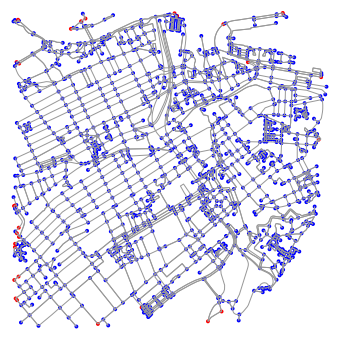

(<Figure size 630.034x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fbf92982a20>)

In [99]:
colorMapNodes = ["b" if ox.is_endpoint(G=graphQcReduced,node=n) else "r" for n in graphQcReduced.nodes()]
ox.plot_graph(graphQcReduced,node_color=colorMapNodes )

In [ ]:
graphQcReduced.add_edge